### 导入graphlab

In [112]:
import graphlab

In [113]:
graphlab.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 4)

### 读取excel文件

In [114]:
houses = graphlab.SFrame.read_csv('/Users/Redheat/Downloads/lianjia.csv') #读取csv文件

Finished parsing file /Users/Redheat/Downloads/lianjia.csv

Parsing completed. Parsed 100 lines in 0.062472 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,str,int,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Redheat/Downloads/lianjia.csv

Parsing completed. Parsed 3000 lines in 0.034699 secs.

In [115]:
print houses

+--------------+----------+------+-----------+-------+------------------+------+
|   village    |   room   | size | direction | price |       age        | area |
+--------------+----------+------+-----------+-------+------------------+------+
| 北街家园五区 | 1房间1卫 |  18  |     东    |  900  | 2011年建板塔结合 | 昌平 |
| 北街家园五区 | 1房间1卫 |  18  |     东    |  1100 | 2011年建板塔结合 | 昌平 |
| 温泉花园B区  |  4室1厅  |  10  |     北    |  1460 |   1999年建板楼   | 昌平 |
|    国惠村    |  3室1厅  |  7   |     南    |  1560 |       板楼       | 昌平 |
| 东关南里小区 |  5室1厅  |  10  |     南    |  1590 |   1999年建板楼   | 昌平 |
|    国惠村    |  3室1厅  |  9   |     北    |  1590 |       板楼       | 昌平 |
|    京科苑    |  3室1厅  |  12  |     北    |  1590 |   1998年建板楼   | 昌平 |
| 东关南里小区 |  5室1厅  |  11  |     南    |  1630 |   1999年建板楼   | 昌平 |
|  金隅万科城  |  3室1厅  |  9   |     东    |  1690 | 2010年建板塔结合 | 昌平 |
|  金色漫香苑  |  5室1厅  |  12  |     南    |  1690 |   2013年建板楼   | 昌平 |
+--------------+----------+------+-----------+-------+------------------+------+
+-------

### 在浏览器打开,设定x和y轴

In [116]:
graphlab.canvas.set_target('browser')#在浏览器打开
houses.show(view="Scatter Plot", x="size", y="price")

Canvas is accessible via web browser at the URL: http://localhost:52664/index.html
Opening Canvas in default web browser.


### 按百分比区分训练集和测试集,然后创建一个线性回归模型

In [117]:
train_data,test_data = houses.random_split(.8,seed=0)#按80%分成测试集和训练集

In [118]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['size'],validation_set=None)#创建一个线性回归模型

Linear regression:

--------------------------------------------------------

Number of examples          : 2397

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.001545     | 57292.103255       | 3140.584825   |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [119]:
print test_data['price'].mean() #平均值

5551.75787728


In [120]:
print sqft_model.evaluate(test_data)#模型评估函数

{'max_error': 48598.55827483511, 'rmse': 3454.8602711581025}


### 绘制图形

In [121]:
#绘图
import matplotlib.pyplot as plt 
#在notebook绘图
%matplotlib inline 

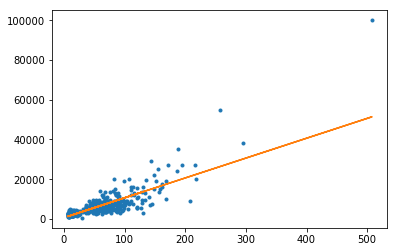

In [122]:
#分别以.和-绘制图形
plt.plot(test_data['size'],test_data['price'],'.',
        test_data['size'],sqft_model.predict(test_data),'-')

In [123]:
sqft_model.get('coefficients') #获取权重

name,index,value,stderr
(intercept),None,639.133107472,92.3674941666
size,None,99.9258043655,1.35198594085


### 增加新特征

In [124]:
house_features = ['village', 'room', 'size', 'direction', 'age','area','position','id']

In [125]:
houses[house_features].show()

Canvas is accessible via web browser at the URL: http://localhost:52664/index.html
Opening Canvas in default web browser.


In [99]:
houses.show(view='BoxWhisker Plot', x='area', y='price')

Canvas is updated and available in a tab in the default browser.


### 创建基于新特征的线性回归

In [110]:
house_features_model = graphlab.linear_regression.create(train_data,target='price',features=house_features,validation_set=None) #更多特征

WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Linear regression:

--------------------------------------------------------

Number of examples          : 2397

Number of features          : 8

Number of unpacked features : 8

Number of coefficients    : 3167

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+--------------------+---------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+-----------+--------------+--------------------+---------------+

| 1         | 6        | 0.000031  | 0.042670     | 53103.149092       | 3375.942678   |

| 2         | 8        | 1.000000  | 0.052740     | 35816.367275       | 2300.652946   |

| 3         | 9        | 1.000000  | 0.059267     | 17173.902257       | 1169.537041   |

| 4         | 10       | 1.000000  | 0.065088     | 14903.294155       | 874.979545    |

| 5         | 11       | 1.000000  | 0.072259     | 12989.015567       | 818.705017    |

| 6         | 12       | 1.000000  | 0.081864     | 12278.632923       | 729.876650    |

+-----------+----------+-----------+--------------+--------------------+---------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [101]:
print sqft_model.evaluate(test_data) #第一个模型评估
print house_features_model.evaluate(test_data) #多特征模型评估

{'max_error': 28172.114309115557, 'rmse': 2836.2025127973175}
{'max_error': 43364.41357806163, 'rmse': 3230.530274359745}


### 价格获取和预测

In [102]:
house1 = houses[houses['id']=='BJ0004399001']

In [103]:
print house1['price'] #真实价格

[1530, ... ]


In [104]:
print sqft_model.predict(house1)#单特征预测价格

[1463.9735019330951]


In [111]:
print house_features_model.predict(house1) #多特征预测价格

[1658.748404535839]


<img src="https://image1.ljcdn.com/lianjia-data-sync/ziroom/15289570226877_2440114952_0.jpg.600x450.jpg">